The objetive of this function is to try different clusters automatically and then analyse the quality of the cluster using silhoutte.

At lest we want to test three different cluster algoritms, the normally used hierarquical clustering using ward, the kmeans, the affinity propagation method, and the density clusted DBSCAN.

We know that in our dataset most variable show no normal behaiour and also we have many outliers. We had scaled the data using MinMax and Standarscaler, and Ptranform scaler. After PowerTransform scaler we got a dataset with more normally distributed variables and fewer outliers. 



In [1]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [2]:
from sklearn import metrics
from sklearn.cluster import DBSCAN




In [3]:
import pandas as pd


In [4]:
datos_Ptrans = pd.read_csv(r"C:\Users\crist\Documents\GitHub\manifolds\ciudades\datos\cluster\df_datos_PTrans.csv", encoding = "ISO-8859-1", index_col = [0] )


In [5]:
datos_Ptrans['F1'] = datos_Ptrans['AREA_MN'] * 0.815 + datos_Ptrans["ED"] * 0.913 + datos_Ptrans["RES_PLU"]  * 0.654 
datos_Ptrans['F2'] = datos_Ptrans['LPI'] * -0.848 + datos_Ptrans['SPLIT'] * 0.834 + datos_Ptrans['MESH'] * -0.764
datos_Ptrans['F3'] = datos_Ptrans['LSI'] * 0.755 + datos_Ptrans['T_Viviendas'] * 0.957 
datos_Ptrans['F4'] = datos_Ptrans['RES_UNI'] * 0.817 
datos_Ptrans['F5'] = datos_Ptrans['SIDI'] * 0.751 

In [6]:
datos_Ptrans_sel = datos_Ptrans.loc[:,["Ciudades","F1","F2","F3","F4","F5"]]

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
MM = MinMaxScaler()
MM.fit(datos_Ptrans_sel.loc[:,["F1","F2","F3","F4","F5"]])
datos_Ptrans_mm = MM.transform(datos_Ptrans_sel.loc[:,["F1","F2","F3","F4","F5"]])

In [10]:
df_datos_Ptrans_mm = pd.DataFrame(datos_Ptrans_mm, columns= ["F1","F2","F3","F4","F5"])

In [11]:
df_datos_Ptrans_mm.insert(0,'Ciudades',datos_Ptrans["Ciudades"])

# StandarScaler

In [20]:
def Scaler(df,method):
    st = method
    scaler = st.fit_transform(df)
    col = df.columns
    df_scaler = pd.DataFrame(data = scaler, columns = col)
    return df_scaler
    

In [22]:
Scaler(datos_Ptrans_sel.iloc[:,-5:], MinMaxScaler())

,F1,F2,F3,F4,F5
0,0.456580,0.607890,0.479798,0.677869,0.551441
1,0.304864,0.560888,0.406081,0.259417,0.492855
2,0.403916,0.554543,0.180514,0.755331,0.492855
3,0.569109,0.532872,0.302310,0.233135,0.569546
4,0.222185,0.639836,0.406158,0.924669,0.096409
...,...,...,...,...,...
67,0.876660,0.583988,0.798597,0.246321,0.311259
68,0.448438,0.503083,0.566250,0.403585,0.608505
69,0.424973,0.461387,0.711605,0.834688,0.242853
70,0.473067,0.304139,0.221745,0.478407,0.699787


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
st = StandardScaler()
st.fit(datos_Ptrans_sel.iloc[:,-5:])
datos_Ptrans_st = st.transform(datos_Ptrans_sel.iloc[:,-5:])

In [11]:
col = datos_Ptrans_sel.iloc[:,-5:].columns

In [12]:
df_datos_Ptrans_st = pd.DataFrame(data = datos_Ptrans_st, 
                                  columns = col)

In [15]:
df_datos_Ptrans_st.insert(0,"Ciudad", datos_Ptrans["Ciudades"])

# CLUSTER ANALYSIS

In [16]:
from sklearn.cluster import AgglomerativeClustering 


In [17]:
n_clusters = [1,2,3,4,5]

In [18]:
def AGcluster_col(df,n):
    Ag = AgglomerativeClustering(n_clusters = 5)
    Ag.fit(df)
    df['clusters'] = Ag.labels_
    return df

In [19]:
df_datos_Ptrans_st_clus =  AGcluster_col(df_datos_Ptrans_st.iloc[:,-5:],5)

In [20]:
import seaborn as sns

In [21]:
df_datos_Ptrans_st_clus.insert(0,"Ciudades", datos_Ptrans['Ciudades'])

<AxesSubplot:xlabel='F1', ylabel='F2'>

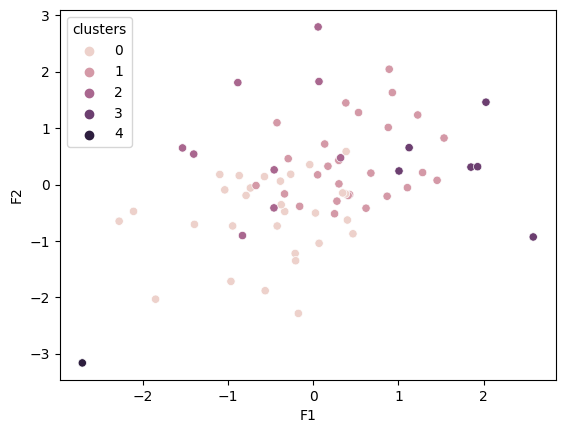

In [22]:
sns.scatterplot(data = df_datos_Ptrans_st_clus, x = "F1", y = "F2", hue = "clusters") 

In [23]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

In [24]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer


# Interactive Chart.

In [25]:
import plotly.express as px


In [65]:
fig = px.scatter(df_datos_Ptrans_st_clus,x='F2', y='F5', color ='clusters', hover_data = ["Ciudades",'clusters'])
fig.show()

In [26]:
from sklearn.cluster import KMeans

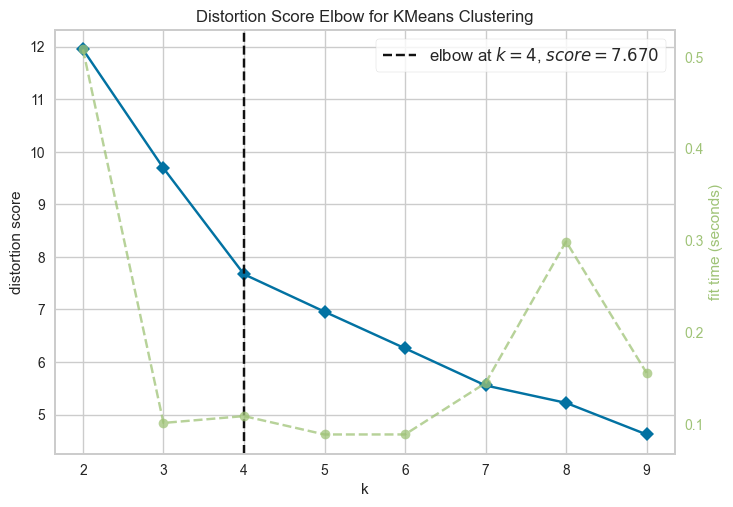

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
#ELBOW
aglomerativo = AgglomerativeClustering()
KM = KMeans()
visualizer = KElbowVisualizer(KM, k=(2,10), timings = True)
visualizer.fit(df_datos_Ptrans_mm.iloc[:,1:6])
visualizer.show()

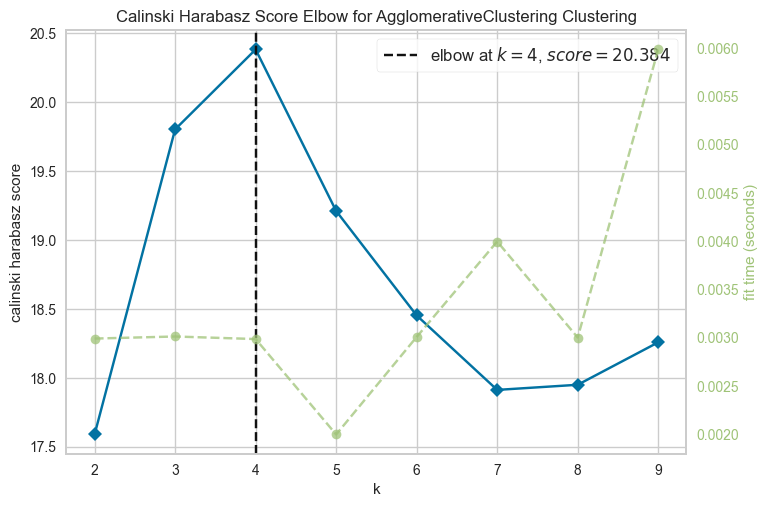

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [28]:
visualizer_sil = KElbowVisualizer(aglomerativo, k = (2,10), metric = "calinski_harabasz",
                                  timings = True)

visualizer_sil.fit(df_datos_Ptrans_mm.iloc[:,1:6])

visualizer_sil.show()


KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=AgglomerativeClustering(n_clusters=9), k=(2, 10),
                 metric='silhouette')

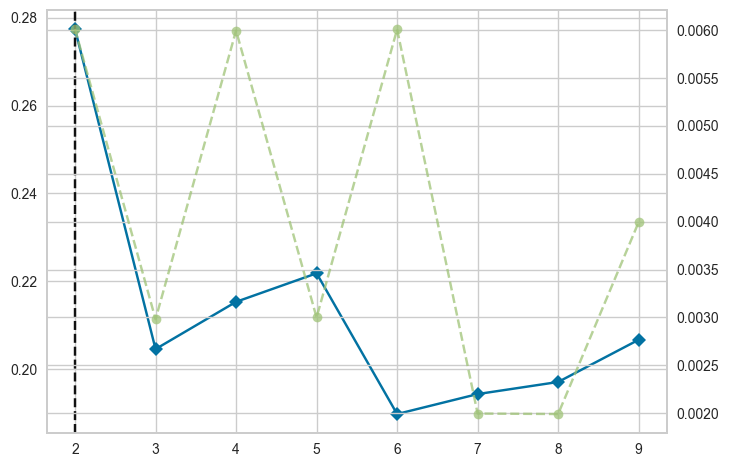

In [29]:
visualizer_sil = KElbowVisualizer(aglomerativo, k = (2,10), metric = "silhouette",
                                  timings = True)

visualizer_sil.fit(df_datos_Ptrans_mm.iloc[:,1:6])



In [30]:
pd.DataFrame({'n_clusters': visualizer_sil.k_values_, 'k_means_sil' : visualizer_sil.k_scores_ })   


,n_clusters,k_means_sil
0,2,0.277411
1,3,0.204567
2,4,0.215324
3,5,0.221818
4,6,0.189792
5,7,0.194335
6,8,0.197087
7,9,0.206696


In [31]:
visualizer_sil.k_scores_ ## Valores para cada clustes


[0.27741132911550753,
 0.20456745565620385,
 0.2153242771733276,
 0.22181845685193535,
 0.189792224685659,
 0.1943346265030498,
 0.19708718385318028,
 0.2066955517803165]

# Function para calcular silhouette

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
clusters_functions = [AgglomerativeClustering,KMeans]

In [34]:
from sklearn.cluster import AffinityPropagation

In [35]:
AF = AffinityPropagation()
X = datos_Ptrans_mm
AF.fit(X)
AF.labels_

array([0, 6, 6, 6, 1, 0, 0, 5, 1, 2, 3, 3, 5, 3, 1, 2, 5, 6, 1, 2, 5, 1,
       1, 3, 6, 0, 0, 2, 6, 3, 4, 6, 2, 0, 0, 4, 4, 6, 3, 2, 2, 0, 1, 2,
       5, 4, 0, 1, 3, 6, 0, 4, 6, 0, 4, 1, 3, 0, 2, 5, 2, 6, 5, 0, 6, 5,
       7, 3, 2, 1, 4, 2], dtype=int64)

In [36]:
df_datos_Ptrans_st_clus['Af_clust'] = AF.labels_
df_datos_Ptrans_st_clus

,Ciudades,F1,F2,F3,F4,F5,clusters,Af_clust
0,Albacete,-0.293192,0.459059,0.188866,0.736434,-0.000419,1,0
1,Alcalá de Henares,-1.096090,0.178993,-0.155832,-1.128990,-0.240399,0,6
2,Alcobendas,-0.571892,0.141186,-1.210573,1.081756,-0.240399,0,6
3,Alcorcón,0.302330,0.012053,-0.641061,-1.246154,0.073740,1,6
4,Algeciras,-1.533635,0.649416,-0.155470,1.836653,-1.864307,2,1
...,...,...,...,...,...,...,...,...
67,Valencia,1.929925,0.316634,1.679559,-1.187370,-0.984247,3,3
68,Valladolid,-0.336278,-0.165451,0.593113,-0.486300,0.233324,1,2
69,Vigo,-0.460458,-0.413899,1.272786,1.435524,-1.264447,2,1
70,Zamora,-0.205936,-1.350888,-1.017777,-0.152752,0.607229,0,4


In [37]:
fig = px.scatter(df_datos_Ptrans_st_clus,x='F1', y='F4', color ='Af_clust', hover_data = ["Ciudades",'Af_clust'])
fig.show()

In [38]:
df_datos_Ptrans_mm['Affinity_clus'] = AF.labels_

# Ejemplo de un DBSCAN

In [39]:
from sklearn.cluster import DBSCAN

In [70]:
dbscan = DBSCAN(eps = 1, min_samples = 2)
dbscan.fit(df_datos_Ptrans_st.loc[:,['F1','F2','F3','F4','F5']])
labels = dbscan.labels_
labels


array([ 0,  1, -1,  2,  3,  0,  0, -1,  3,  4, -1,  5, -1, -1, -1,  2,  6,
       -1, -1,  7,  8, -1,  9,  5,  1, -1, -1,  7,  8, 10,  2, -1,  2, -1,
        0,  2,  2,  2, 10,  4, -1, -1,  9,  4,  6,  2,  0, -1, -1,  8,  0,
       -1, -1,  0,  2, -1, -1,  0,  4,  8, -1, -1,  2,  0, -1, -1, -1, -1,
        7,  9, -1, -1], dtype=int64)

In [72]:
silhouette_score(df_datos_Ptrans_st.loc[:,['F1','F2','F3','F4','F5']],labels)

TypeError: 'numpy.float64' object is not callable

In [42]:
df_datos_Ptrans_st['dbcluster'] = labels

In [43]:
df_datos_Ptrans_st

,Ciudad,F1,F2,F3,F4,F5,dbcluster
0,Albacete,-0.293192,0.459059,0.188866,0.736434,-0.000419,0
1,Alcalá de Henares,-1.096090,0.178993,-0.155832,-1.128990,-0.240399,1
2,Alcobendas,-0.571892,0.141186,-1.210573,1.081756,-0.240399,-1
3,Alcorcón,0.302330,0.012053,-0.641061,-1.246154,0.073740,2
4,Algeciras,-1.533635,0.649416,-0.155470,1.836653,-1.864307,3
...,...,...,...,...,...,...,...
67,Valencia,1.929925,0.316634,1.679559,-1.187370,-0.984247,-1
68,Valladolid,-0.336278,-0.165451,0.593113,-0.486300,0.233324,7
69,Vigo,-0.460458,-0.413899,1.272786,1.435524,-1.264447,9
70,Zamora,-0.205936,-1.350888,-1.017777,-0.152752,0.607229,-1


In [45]:
px.scatter(df_datos_Ptrans_st, x = 'F5', y = 'F4', color = 'dbcluster', hover_data=['Ciudad','dbcluster'])

# Funcion cluster analysis para iterar por distintos methods de cluster

In [265]:
from sklearn.metrics import silhouette_score

In [264]:
# Function para implementar fit de un methodo cluster y obtener el score the silhoutte
def cluster_analysis_score(cluster_method,df,n):
    clus = cluster_method(n_clusters = n)
    clus.fit(df)
    labels = clus.labels_ 
    silhouette_avg = silhouette_score(df,labels)
    return(silhouette_avg,labels)



In [305]:
Ptrans_mm_1 = df_datos_Ptrans_mm.iloc[:,1:6]
silo, labels = cluster_analysis_score(AgglomerativeClustering,Ptrans_mm_1,10)
print(silo)

0.21185623448121416


In [306]:
Ptrans_mm_2 = df_datos_Ptrans_mm.iloc[:,1:4]
silo, labels = cluster_analysis_score(AgglomerativeClustering,Ptrans_mm_2,4)                                          
print(silo)


0.23478597673710377


In [279]:
datos_usos = datos_Ptrans.loc[:,  ['COM',
       'ED_SING', 'EQUIP', 'IND', 'OCIO', 'OFI', 'RES_PLU', 'RES_UNI']]

In [303]:
import copy

In [311]:
## Iteracion por datos # 
## Esto se puede perfeccionar pero funciona. 

n_cluster = []
lista_datos = [Ptrans_mm_1, Ptrans_mm_2, datos_usos]
nombre_datos = ['Ptrans_mm_1', 'Ptrans_mm_2','datos_usos']
sil_list = []
num = []
l_df1 = pd.DataFrame()
l_df2 = pd.DataFrame()
df_list = copy.deepcopy(lista_datos)
numbers = [2,3,4,5,6,7,8,9,10]
for number in numbers:
    for index, item in enumerate(lista_datos):
        n = number
        sil, labels = cluster_analysis_score(AgglomerativeClustering, lista_datos[index], n)
        num.append(n)
        sil_list.append(sil)
        df_name = "AG"+str(n)+nombre_datos[index]
        df_list[index][df_name] = labels


       

In [312]:
for index, item in enumerate(df_list):
    df_list[index]['Ciudades']  = datos_Ptrans.loc[:,['Ciudades']] 


In [313]:
df_list[0]

,F1,F2,F3,F4,F5,AG2Ptrans_mm_1,AG3Ptrans_mm_1,AG4Ptrans_mm_1,AG5Ptrans_mm_1,AG6Ptrans_mm_1,AG7Ptrans_mm_1,AG8Ptrans_mm_1,AG9Ptrans_mm_1,AG10Ptrans_mm_1,Ciudades
0,0.456580,0.607890,0.479798,0.677869,0.551441,0,0,2,0,5,5,5,5,5,Albacete
1,0.304864,0.560888,0.406081,0.259417,0.492855,0,0,1,1,1,0,7,7,3,Alcalá de Henares
2,0.403916,0.554543,0.180514,0.755331,0.492855,0,2,0,2,0,1,0,8,8,Alcobendas
3,0.569109,0.532872,0.302310,0.233135,0.569546,0,0,1,1,1,0,7,7,3,Alcorcón
4,0.222185,0.639836,0.406158,0.924669,0.096409,1,1,3,3,3,3,3,3,1,Algeciras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.876660,0.583988,0.798597,0.246321,0.311259,0,0,1,1,1,0,1,1,0,Valencia
68,0.448438,0.503083,0.566250,0.403585,0.608505,0,0,1,1,1,0,7,7,3,Valladolid
69,0.424973,0.461387,0.711605,0.834688,0.242853,1,1,3,3,3,3,3,3,1,Vigo
70,0.473067,0.304139,0.221745,0.478407,0.699787,0,2,0,2,0,1,0,2,2,Zamora


In [314]:
sil_list

[0.27741132911550753,
 0.3063735318524567,
 0.1706744135200078,
 0.20456745565620385,
 0.2573739142545347,
 0.11809003788396234,
 0.2153242771733276,
 0.23478597673710377,
 0.12882431275483472,
 0.22181845685193535,
 0.24755744395822335,
 0.11613176561833446,
 0.189792224685659,
 0.2632192985015066,
 0.11917763375416356,
 0.1943346265030498,
 0.277741539376704,
 0.11752986147117792,
 0.19708718385318028,
 0.2934471278614014,
 0.1189896493489379,
 0.2066955517803165,
 0.3035529574499013,
 0.12400841500613557,
 0.21185623448121416,
 0.31195401406710516,
 0.1250758769263881]

In [254]:
lista_datos = [Ptrans_mm_1, Ptrans_mm_2]


In [315]:
pd.DataFrame({'Data': 9*nombre_datos, "Sil_Score": sil_list, "n_clusters" : num})

,Data,Sil_Score,n_clusters
0,Ptrans_mm_1,0.277411,2
1,Ptrans_mm_2,0.306374,2
2,datos_usos,0.170674,2
3,Ptrans_mm_1,0.204567,3
4,Ptrans_mm_2,0.257374,3
5,datos_usos,0.118090,3
6,Ptrans_mm_1,0.215324,4
7,Ptrans_mm_2,0.234786,4
8,datos_usos,0.128824,4
9,Ptrans_mm_1,0.221818,5


In [318]:
lista_datos[0]

,F1,F2,F3,F4,F5
0,0.456580,0.607890,0.479798,0.677869,0.551441
1,0.304864,0.560888,0.406081,0.259417,0.492855
2,0.403916,0.554543,0.180514,0.755331,0.492855
3,0.569109,0.532872,0.302310,0.233135,0.569546
4,0.222185,0.639836,0.406158,0.924669,0.096409
...,...,...,...,...,...
67,0.876660,0.583988,0.798597,0.246321,0.311259
68,0.448438,0.503083,0.566250,0.403585,0.608505
69,0.424973,0.461387,0.711605,0.834688,0.242853
70,0.473067,0.304139,0.221745,0.478407,0.699787


In [333]:
df_list[0]

,F1,F2,F3,F4,F5,AG2Ptrans_mm_1,AG3Ptrans_mm_1,AG4Ptrans_mm_1,AG5Ptrans_mm_1,AG6Ptrans_mm_1,AG7Ptrans_mm_1,AG8Ptrans_mm_1,AG9Ptrans_mm_1,AG10Ptrans_mm_1,Ciudades
0,0.456580,0.607890,0.479798,0.677869,0.551441,0,0,2,0,5,5,5,5,5,Albacete
1,0.304864,0.560888,0.406081,0.259417,0.492855,0,0,1,1,1,0,7,7,3,Alcalá de Henares
2,0.403916,0.554543,0.180514,0.755331,0.492855,0,2,0,2,0,1,0,8,8,Alcobendas
3,0.569109,0.532872,0.302310,0.233135,0.569546,0,0,1,1,1,0,7,7,3,Alcorcón
4,0.222185,0.639836,0.406158,0.924669,0.096409,1,1,3,3,3,3,3,3,1,Algeciras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.876660,0.583988,0.798597,0.246321,0.311259,0,0,1,1,1,0,1,1,0,Valencia
68,0.448438,0.503083,0.566250,0.403585,0.608505,0,0,1,1,1,0,7,7,3,Valladolid
69,0.424973,0.461387,0.711605,0.834688,0.242853,1,1,3,3,3,3,3,3,1,Vigo
70,0.473067,0.304139,0.221745,0.478407,0.699787,0,2,0,2,0,1,0,2,2,Zamora


In [338]:
cl1 = df_list[0]
px.scatter(cl1, x = 'F1', y = 'F2', color = "AG4Ptrans_mm_1", hover_data=["Ciudades","AG4Ptrans_mm_1"]) 
#px.scatter(df_datos_Ptrans_st, x = 'F5', y = 'F4', color = 'dbcluster', hover_data=['Ciudad','dbcluster'])

# Datos 

In [489]:
def ajustar_data(df, variables):
    df = df.drop("Ciudades", axis = 1)
    df_melt = df.melt(id_vars = variables_to_keep)
    return df_melt

In [476]:
variables_keep = ('AG2Ptrans_mm_1', 'AG3Ptrans_mm_1',
       'AG4Ptrans_mm_1', 'AG5Ptrans_mm_1', 'AG6Ptrans_mm_1', 'AG7Ptrans_mm_1',
       'AG8Ptrans_mm_1', 'AG9Ptrans_mm_1', 'AG10Ptrans_mm_1')

In [490]:
df_melt = ajustar_data(df_list[0], variables_keep)
df_melt

,AG2Ptrans_mm_1,AG3Ptrans_mm_1,AG4Ptrans_mm_1,AG5Ptrans_mm_1,AG6Ptrans_mm_1,AG7Ptrans_mm_1,AG8Ptrans_mm_1,AG9Ptrans_mm_1,AG10Ptrans_mm_1,variable,value
0,0,0,2,0,5,5,5,5,5,F1,0.456580
1,0,0,1,1,1,0,7,7,3,F1,0.304864
2,0,2,0,2,0,1,0,8,8,F1,0.403916
3,0,0,1,1,1,0,7,7,3,F1,0.569109
4,1,1,3,3,3,3,3,3,1,F1,0.222185
...,...,...,...,...,...,...,...,...,...,...,...
355,0,0,1,1,1,0,1,1,0,F5,0.311259
356,0,0,1,1,1,0,7,7,3,F5,0.608505
357,1,1,3,3,3,3,3,3,1,F5,0.242853
358,0,2,0,2,0,1,0,2,2,F5,0.699787


In [491]:
def group_data(df,cluster):
    im3_groups_mean = df.groupby(['variable',cluster,
    ])['value'].mean().reset_index() 
    
    return im3_groups_mean

In [498]:
im3_groups_mean = group_data(df_melt, 'AG3Ptrans_mm_1')

In [499]:
import seaborn.objects as so
from seaborn import axes_style

In [501]:
interactive_scatter(im3_groups_mean,'AG3Ptrans_mm_1')

In [502]:
cl1 = df_list[0]
px.scatter(cl1, x = 'F3', y = 'F4', color = "AG4Ptrans_mm_1", hover_data=["Ciudades","AG4Ptrans_mm_1"]) 

In [23]:
# Customize the layout (optional)
fig.update_layout(title='3D Scatter Plot', scene=dict(xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis'))

# Show the plot
fig.show()






NameError: name 'fig' is not defined

In [258]:
## Iteracion por methodo de cluster 
n_clus = []
sil_list = []
cluster_names = ['Aglomerative','Kmeans']
num = []
numbers = [2,3,4,5,6,7,8,9,10]
for number in numbers:
    #print(number)    
    for index, item in enumerate(clusters_functions): # podria ser interesante ennumerate
        n = number
        a = cluster_analysis_score(item,df_datos_Ptrans_mm.iloc[:,1:6],n)
        num.append(n)
        sil_list.append(a)
        #print(a)
    
    

In [259]:
sil_list

[(0.27741132911550753,
  array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0], dtype=int64)),
 (0.23801659927771698,
  array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
         0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
         1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
         1, 0, 1, 0, 1, 0])),
 (0.20456745565620385,
  array([0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2,
         1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
         2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2,
         2, 0, 0, 1, 2, 0], dtype=int64)),
 (0.22130037888924736,
  array([1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2,
         2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 

In [260]:
pd.DataFrame({'Method': 9*cluster_names, "Sil_Score": sil_list, "n_clusters" : num})

,Method,Sil_Score,n_clusters
0,Aglomerative,"(0.27741132911550753, [0, 0, 0, 0, 1, 0, 0, 0,...",2
1,Kmeans,"(0.23801659927771698, [0, 1, 1, 1, 0, 0, 0, 1,...",2
2,Aglomerative,"(0.20456745565620385, [0, 0, 2, 0, 1, 0, 0, 2,...",3
3,Kmeans,"(0.22130037888924736, [1, 0, 0, 1, 2, 1, 1, 0,...",3
4,Aglomerative,"(0.2153242771733276, [2, 1, 0, 1, 3, 2, 2, 0, ...",4
5,Kmeans,"(0.25413226179339343, [2, 3, 0, 3, 1, 2, 2, 0,...",4
6,Aglomerative,"(0.22181845685193535, [0, 1, 2, 1, 3, 0, 0, 2,...",5
7,Kmeans,"(0.22106331947002358, [1, 3, 1, 3, 2, 0, 0, 1,...",5
8,Aglomerative,"(0.189792224685659, [5, 1, 0, 1, 3, 5, 5, 0, 3...",6
9,Kmeans,"(0.21649820710783904, [1, 5, 0, 5, 2, 1, 1, 0,...",6


In [109]:
sil_dic1 = {}
for index, item in enumerate(clusters_functions):
    a = cluster_analysis_score(item,df,2)
    sil_dic1[cluster_names[index]] = a
    
    

In [110]:
df_b = pd.DataFrame()

In [111]:
pd.DataFrame(list(sil_dic1.items()), columns = ["Method","Score"])

,Method,Score
0,Aglomerative,0.277411
1,Kmeans,0.238017


How can I do this as well returing a dataframe

In [143]:

def cluster_analysis(cluster_method,df):
    visualizer_sil = KElbowVisualizer(cluster_method, k = (2,10), metric = "silhouette",
                                  timings = True)
    visualizer_sil.fit(df)
    return visualizer_sil.k_scores_

    

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=AgglomerativeClustering(n_clusters=9), k=(2, 10),
                 metric='silhouette')

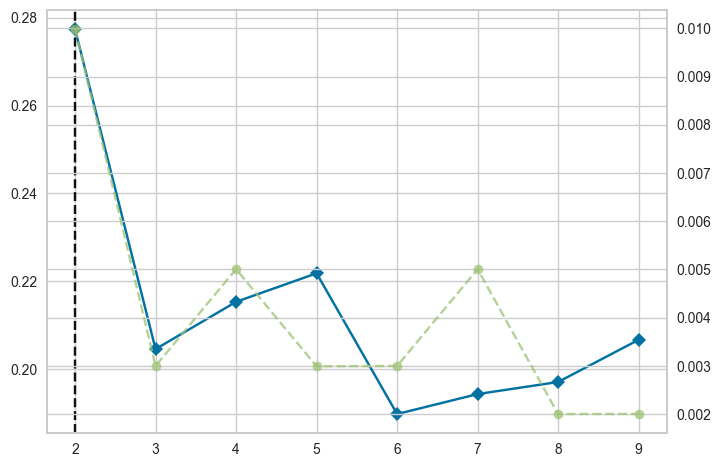

In [187]:
Ptrans_mm_1 = df_datos_Ptrans_mm.iloc[:,1:6]
visualizer_sil = KElbowVisualizer(aglomerativo, k = (2,10), metric = "silhouette",
                                  timings = True)

visualizer_sil.fit(Ptrans_mm_1)

[0.27741132911550753,
 0.20456745565620385,
 0.2153242771733276,
 0.22181845685193535,
 0.189792224685659,
 0.1943346265030498,
 0.19708718385318028,
 0.2066955517803165]

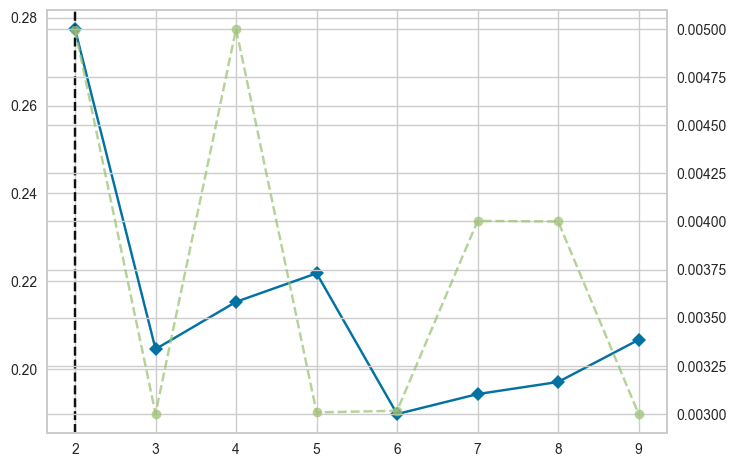

In [146]:
cluster_analysis(aglomerativo,df_datos_Ptrans_mm.iloc[:,1:6])

### Necesitamos definir distintos dataset con algunas hipotesis eliminando algunas observaciones que podrian ser outliers y algunas variables. 

1. En principio podemos eliminar del dataset torrejon de ardoz debido a que es un outliers muy importante.

A- En los datos Ptrans el mayor numero de outliers de las observaciones es torrejon de ardoz, Madrid. 

B- Desde el punto de vista de las variables podemos descartar SQUAERE_MN 

